## In a room, there are $n$ angry people with guns. Every minute the people in the room spin and kill one of them at random. Eventually either everyone dies or there is exactly one survivor.

## What is the probability that there is a survivor ?


In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def one_round(num_people): #arr = array of people in the room
    people_killed = set() #will collect number of people after one round
    if num_people==1:
        return 1

    for i in range(num_people):
        choice = np.random.randint(1,num_people) #for each person sample from 1,2,3..n-1 at random
        people_killed.add((i+choice)%num_people) #kill random people given by above choice
    return num_people-len(people_killed)

In [44]:
def prob_est(num_people,num_sim = 1000):
    success = 0 #number of times there is a survivor
    for i in range(num_sim):
        num_survivors = num_people #number of survivors after every round
        while num_survivors > 2:
              num_survivors = one_round(num_survivors) #simulate a round
        success += 1 if num_survivors == 1 else 0
    return success/num_sim

In [46]:
def prob_plot(high, low=1, num_sim = 1000): #find k  vs prob(there is a survivor in a room with k people)
    x = np.arange(low,high+1)
    y = [prob_est(k,num_sim) for k in x]
    plt.plot(x,y)

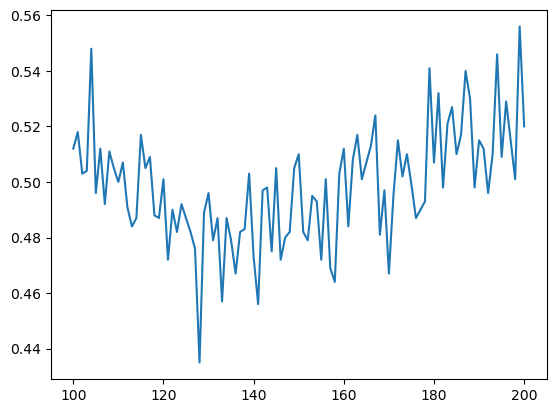

In [63]:
prob_plot(low = 100, high = 200)

 #### Apparently, $\mathbb{P}(\text{ there is a survivor with }n \text{ people})$  does not converge